**World Population Dataset Analysis**

***Feature Description***

•	Country - Name of the Country.

•	Rank - Rank of the paricular Country (Decided by Population).

•	Area - The land area of the Country (measured in km^2).

•	CCA2 - 2 Digit code of a Particular Country.

•	CCA3 - 3 Digit code of a Particular Country.

•	Growth Rate - The Population Growth Rate of the Country.

•	World Population Percentage - The percentage of the World Population residing in that Country.

•	Density - The Population Density of the Country (measured in per km^2)

•	1980 population - The Population of the Country in year 1980.

•	2000 population - The Population of the Country in year 2000.

•	2020 population - The Population of the Country in year 2020.


•	2010 population - The Population of the Country in year 2010.

•	2022 population - The Population of the Country in year 2022.

•	2023 population - The Population of the Country in year 2023.

•	2030 population - The Population of the Country in year 2030.

•	2050 population - The Population of the Country in year 2050.


In [39]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
import seaborn as sns
import missingno as msno
import plotly.express as px

In [40]:
data = pd.read_csv("World Population Data.csv")

In [41]:
data.shape

(234, 19)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

In [43]:
data_dup = data.duplicated().any()
print(data_dup)

False


In [44]:
data.describe()

,rank,area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
count,234.000000,2.340000e+02,2.340000e+02,226.000000,234.000000,228.000000,234.000000,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02
mean,117.500000,5.814500e+05,5.571123e+05,0.010306,0.009737,0.004407,451.288182,1168.836388,439.085470,1.898462e+07,2.626947e+07,2.984524e+07,3.407441e+07,3.437442e+07,3.651461e+07,4.148628e+07
std,67.694165,1.761841e+06,1.689972e+06,0.034774,0.012350,0.017375,1979.362419,5126.548664,253.295484,8.178519e+07,1.116982e+08,1.242185e+08,1.367664e+08,1.373864e+08,1.417827e+08,1.481676e+08
min,1.000000,4.400000e-01,4.400000e-01,-0.028600,-0.074500,0.000000,0.138000,0.357400,4.000000,7.330000e+02,6.510000e+02,5.960000e+02,5.100000e+02,5.180000e+02,5.610000e+02,7.310000e+02
25%,59.250000,2.650000e+03,2.625875e+03,0.000000,0.002325,0.000100,39.747650,102.946450,223.000000,2.296142e+05,3.272420e+05,3.931490e+05,4.197385e+05,4.225982e+05,4.561490e+05,5.466058e+05
50%,117.500000,8.119950e+04,7.568925e+04,0.000900,0.008200,0.000750,97.481000,252.475800,439.000000,3.141146e+06,4.292907e+06,4.942770e+06,5.559944e+06,5.643895e+06,6.178231e+06,6.352397e+06
75%,175.750000,4.304258e+05,4.047876e+05,0.008000,0.016850,0.002925,242.928650,629.185350,659.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.247650e+07,2.324537e+07,2.616311e+07,3.568614e+07
max,234.000000,1.709824e+07,1.637687e+07,0.418400,0.049800,0.178500,21402.705200,55433.006400,894.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.425887e+09,1.428628e+09,1.514994e+09,1.670491e+09


In [45]:
data.describe(include = 'object')

,country,cca2,cca3
count,234,233,234
unique,234,233,234
top,India,IN,IND
freq,1,1,1


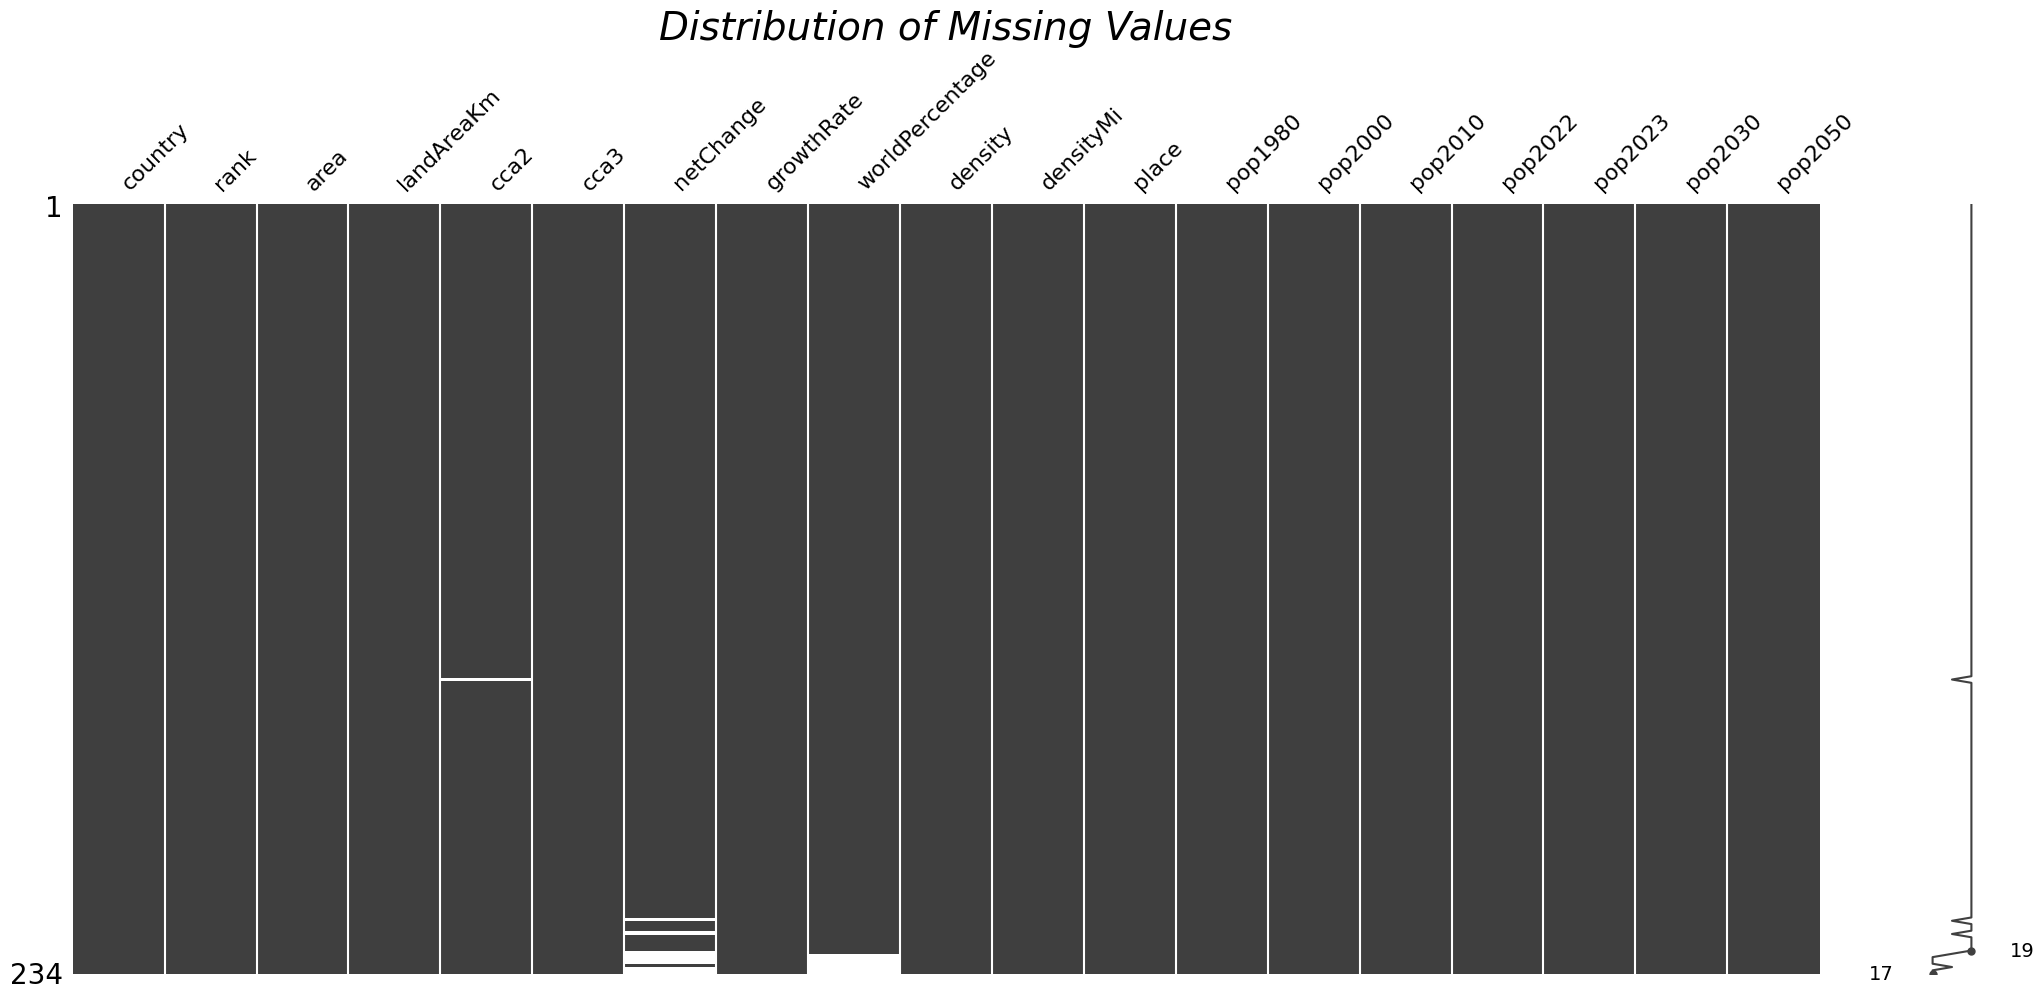

In [46]:
msno.matrix(data)
plt.title('Distribution of Missing Values',fontsize=28, fontstyle= 'oblique');


**To visualise the population spread for the years 1980 Vs 2050**

In [47]:
fig = px.choropleth(data,
                    locations='country',
                    locationmode='country names',
                    color='pop1980',
                    hover_name='country',
                    title = '1980 Population',
                    template='plotly_dark',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(font = dict(size = 17, family="Century Gothic"))
fig.show()

In [48]:
fig = px.choropleth(data,
                    locations='country',
                    locationmode='country names',
                    color='pop2050',
                    hover_name='country',
                    title = '2050 Population',
                    template='plotly_dark',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(font = dict(size = 17, family="Century Gothic"))
fig.show()

**To visualise the growth rate of countries using map**

In [49]:
fig = px.choropleth(data,
                    locations='country',
                    locationmode='country names',
                    color='growthRate',
                    hover_name='country',
                    title = 'Growth Rate',
                    color_continuous_scale='Viridis'
                    )
fig.show()